#### Section 1.0: Introduction

An essential element of a student’s academic career is the ability to identify what lifestyle factors they should adopt, continue, or lose in order to achieve higher academic success. The following study attempts to outline and bring awareness to students regarding the most influential lifestyle factors to academic performance. The prediction model to be developed will aim at predicting a University of Waterloo Engineering student’s cumulative GPA based on their background and various lifestyle factors.

#### Section 2.0: Summary of Progress

To date, the team has performed data collection, exploratory data analysis, and an initial start at building a prediction model. The data collection, explained in Section 3.0, was done through surveying engineering students at the University of Waterloo. The exploratory data analysis, outlined in the report below, involved mapping all explanatory variables against the class variable (cumulative GPA). The exploratory data analysis also consisted of mapping various explanatory variables against each other in order to identify any possible relationships. 
## VICTORIA WRITE SOMETHING ABOUT THE PREDICTION MODEL OR WHATEVER IT IS YOU ARE DOING HERE AND THEN REFER TO SECTION 5.0 WHERE YOU WILL WRITE ABOUT IT IN A BIT MORE DESCRIPTION!

#### Section 3.0: Data Collection

Data was collected through surveying University of Waterloo (UW) engineering students in person throughout the UW campus. The survey, attached in Appendix B was on a Google Form which allowed for data to be collected in a single location, across multiple devices. Currently, 252 data points have been collected, with the eventual goal of reaching at least 500 data points. The target population of the survey were 2nd to 4th year engineering students, omitting 1st year students due to the lack of a cumulative GPA. 

In order to ease data collection, completion of the survey was incentivised through a random draw that will gift $20 Amazon gift cards to 4 participants. The survey will soon be sent to students through social media in order to potentially cover the students which were not surveyed during the in person data collection. 

#### Section 4.0: Data Set

The data set collected through the survey contains 13 explanatory variables for the 1 class variable. The class variable which will be predicted is a student’s cumulative GPA. Each question of the survey maps to a single and unique explanatory variable. The explanatory variables, outlined in the report below, include variables such as nationality status and amount of time spent exercising each week. 

The answers to the survey questions were carefully devised through initially identifying as many discrete answers as possible for each question, then binning the answers into bins which were highly distinguishable from each other. The answers were worded in a way where they would be easy for a student to read and immediately understand the differences between each. For example, the answers for identifying how much sleep a student feels they get were “Not enough (I'm always tired)”, “Enough (I'm rested most of the time)”, and “More than enough (I'm always well rested)”. 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

In [102]:
sns.set(style="darkgrid")
sns.set(style="ticks", color_codes=True)

In [121]:
# Reading data from the data source
data = pd.read_csv('data.csv')
# Changing column names for readability
column_dict = {
    "What year are you in?": "current_year",
    "What faculty are you in?": "faculty", 
    "What was your high school average when you applied to the University of Waterloo?": "hs_average",
    "What is your nationality status?": "nationality_status",
    "What is the highest education level your parents have completed?  [Parent 1]": "parent1_education",
    "What is the highest education level your parents have completed?  [Parent 2]": "parent2_education",
    "On average, how much time do you spend per week participating in social activities during an academic term? (i.e. extracurricular activities, movies, eating out, bars, parties, hanging out, etc.)": "social_time",
    "On average, what percentage of classes do you feel that you attend during an academic term? ": "class_attendance",
    "On average, excluding studying, how much time do you spend looking at a screen, during an academic term? (i.e. Phone, Laptop, TV, etc) ": "screen_time",
    "On average, how much sleep do you get per night during an academic term? ": "sleep_time",
    "On average, how many days do you exercise each week during an academic term?": "excercise_time",
    "On average, how much time do you spend doing school work / studying on a given day during an academic term?": "school_work_time",
    "In relation to school work, how much time do you spend on coop preparation during an academic term? (ie. applications. interview prep. practice, interviews, etc)": "coop_time",
    "Is it a high priority for you to achieve an 80%+ average": "academic_priority",
    'What is your current cumulative average?': "current_average"
}
#  Dictionary for Changing nationality answers for readability
nationality_dict = {
    'International (You are not a Canadian Citizen and are here on a Visa)':'Internationl',
    '1st Generation Canadian Citizen (You were not born in Canada and You are a Canadian Citizen)':'1st_Gen',
    '2nd+ Generation Canadian Citizen (You were born in Canada and you are a Canadian Citizen)':'2nd+_Gen'
}
#  Dictionary for Changing sleep time answers for readability
sleep_dict = {
    "Not enough (I'm always tired)":"Not Enough",
    "Enough (I'm rested most of the time)":"Enough",
    "More than enough (I'm always well rested)":"More than Enough"
}
#  Dictionary for Changing screen time answers for readability
screen_dict = {
    'Regularly, but not a significant amount':'Regularly',
    "I'm almost always looking at a screen":'Almost Always',
    'A significant amount':'A significant amount',
    'Almost never':'Almost never'
}
#  Dictionary for Changing co-op time answers for readability
coop_dict = {
    'Almost none':'Almost none',
    'About the same if not more as school work':"Same or More",
    'A significant amount but still less than school work':'Significant,but less than school',
    'A lot less than school work':'A lot less than school work' 
}
# Dictionary for Changing social time answers for readability
social_dict = {
    'Once or twice a week':'Once/Twice Weekly',
    'Multiple days a week':'Multiple Weekly',
    'Rarely':'Rarely'
}
# Renaming columns
data = data.rename(index=str,columns = column_dict)
# Updating a few rows of data due to incorrect initial survey deployment
# for i in range(0,12):
#     data.faculty[i]='Engineering'

# Extracting data for only engineering students
data = data[data['faculty']=="Engineering"]
data = data.drop(axis=1,columns=["Enter your email address OR phone number if you'd like to be entered for a chance to win 1 of 4 $20 amazon gift cards"])
# Updating column values for readability
data.nationality_status = data.nationality_status.map(nationality_dict)
data.sleep_time = data.sleep_time.map(sleep_dict)
data.social_time = data.social_time.map(social_dict)
data.coop_time = data.coop_time.map(coop_dict)
data.screen_time = data.screen_time.map(screen_dict)


In [104]:
# Defining methods to help normaliz the data
def normalize_3_variables(df3,x,y,column,hue):
    normalized_data = df3[[x,y,column,hue]]
    normalized_data = normalized_data.groupby([x,y,column,hue],as_index=False).size().reset_index()
    normalized_data = normalized_data.rename(index=str,columns = {0:"percent"})
    normalized_data["percent"] = 100*(normalized_data["percent"]/sum(normalized_data["percent"]))
    return normalized_data

def normalize_2_variables(df2,x,y,column):
    normalized_data = df2[[x,y,column]]
    normalized_data = normalized_data.groupby([x,y,column],as_index=False).size().reset_index()
    normalized_data = normalized_data.rename(index=str,columns = {0:"percent"})
    normalized_data["percent"] = 100*(normalized_data["percent"]/sum(normalized_data["percent"]))
    return normalized_data

def normalize_1_variables(df1,x,y):
    normalized_data = df1[[x,y]]
    normalized_data = normalized_data.groupby([x,y],as_index=False).size().reset_index()
    normalized_data = normalized_data.rename(index=str,columns = {0:"percent"})
    normalized_data["percent"] = 100*(normalized_data["percent"]/sum(normalized_data["percent"]))
    return normalized_data

def frequency_3_variables(df3,x,y,column,hue):
    normalized_data = df3[[x,y,column,hue]]
    normalized_data = normalized_data.groupby([x,y,column,hue],as_index=False).size().reset_index()
    normalized_data = normalized_data.rename(index=str,columns = {0:"percent"})
    return normalized_data

def frequency_2_variables(df2,x,y,column):
    normalized_data = df2[[x,y,column]]
    normalized_data = normalized_data.groupby([x,y,column],as_index=False).size().reset_index()
    normalized_data = normalized_data.rename(index=str,columns = {0:"percent"})
    return normalized_data

def frequency_1_variables(df1,x,y):
    normalized_data = df1[[x,y]]
    normalized_data = normalized_data.groupby([x,y],as_index=False).size().reset_index()
    normalized_data = normalized_data.rename(index=str,columns = {0:"percent"})
    return normalized_data

def heatmapify(df,one_var,list_one,two_var,list_two):
    return_list = []
    for one in list_one:
        new_list = []
        rez1 = df.loc[(df[one_var]==one)]
        for two in list_two:
            rez2 = rez1.loc[(rez1[two_var]==two)]
            if(len(rez2)>0):
                (new_list).append((float(rez2["percent"])))
            else:
                (new_list).append(0.0)    
        (return_list).append((new_list))
    heatmapdf = pd.DataFrame(return_list, index=list_one, columns=list_two)
    return heatmapdf

In [105]:
# Objects to help clean and structure the data
order=['60-64%','65-69%','70-74%','75-79%','80-84%','85-89%','90-94%','95-100%','Prefer not to say']
hs_order = ['<80%','80-84%','85-89%','90-94%','95-100%']

# Exploring Relationship of cGPA with All Explanatory Variables

Initial exploratory data analysis is being conducted by through basic charts in order to get a better understanding of all of the existing data, in order to see the distribution of the data. This is being done as an altnernative to generating summary tables of the existing data, due to the variance of data types accross columns. The relationship of each of the variables with the cGPA are explored below. For all of the visualizations below, the values are taken as part of the percentage of the total, so that analysis can be carried out accross different charts and still be compared accross the similar values.

'Current Academic Year and Academic Priority Vs. Current Cumulative Average'


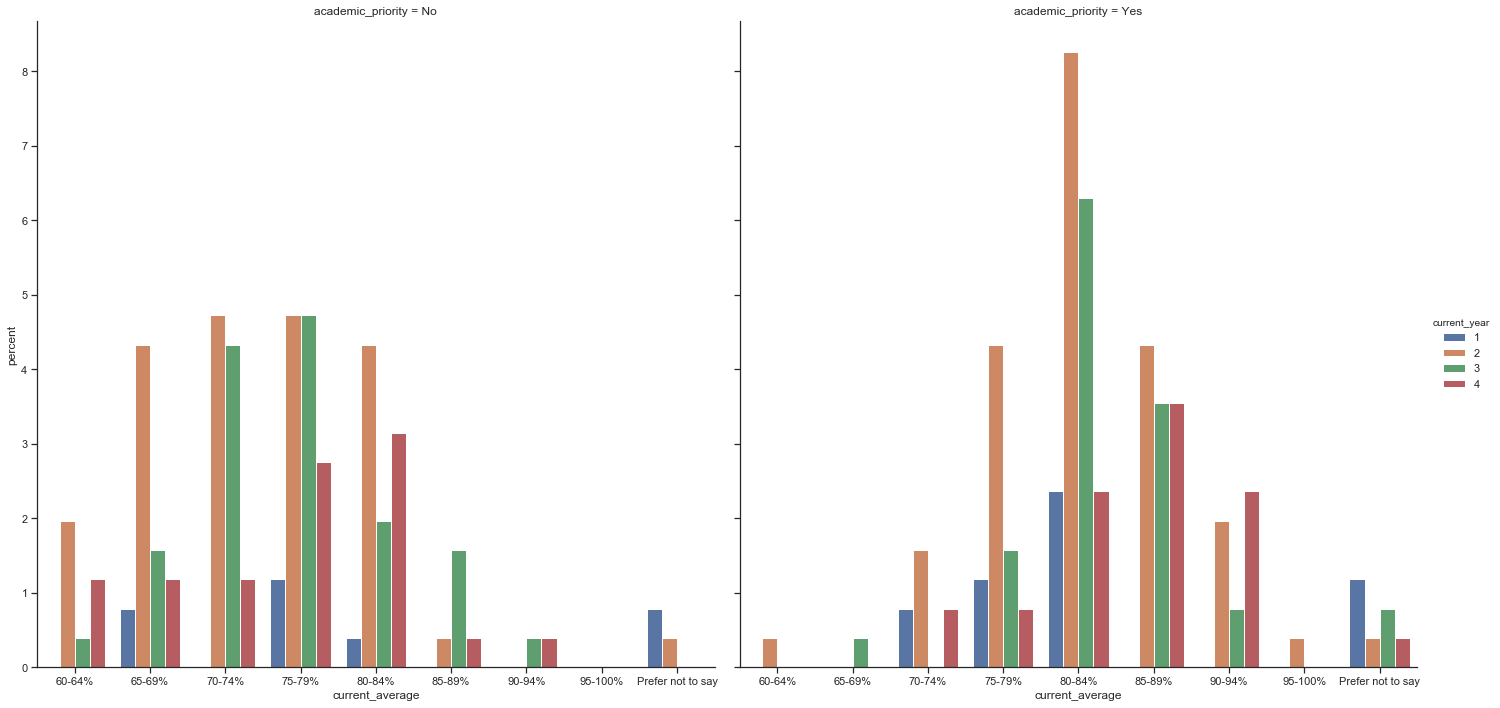

In [106]:

plot_data = normalize_2_variables(data,"current_average","current_year","academic_priority")
sns.catplot(y="percent",x="current_average",order=order,hue="current_year",col="academic_priority",data=plot_data,kind='bar',height=10,aspect=1)
print("'Current Academic Year and Academic Priority Vs. Current Cumulative Average'")

The above diagram attempts to draw a preliminary  understanding of the different  metrics that have been collected, and attempts to make sense of the relations to begin understanding the relationship between different variables, and how they interact to impact the class variable--the cumulaitive average. 

Adding multiple explanatory variables tends to compound the confusion associated with each visualization, so the relationship of each of the explanatory variables and the class variables will be drawn below, in order to explore the impact each variable has on the class variable, in isolation.

'Current Academic Year Vs. Current Cumulative Average'


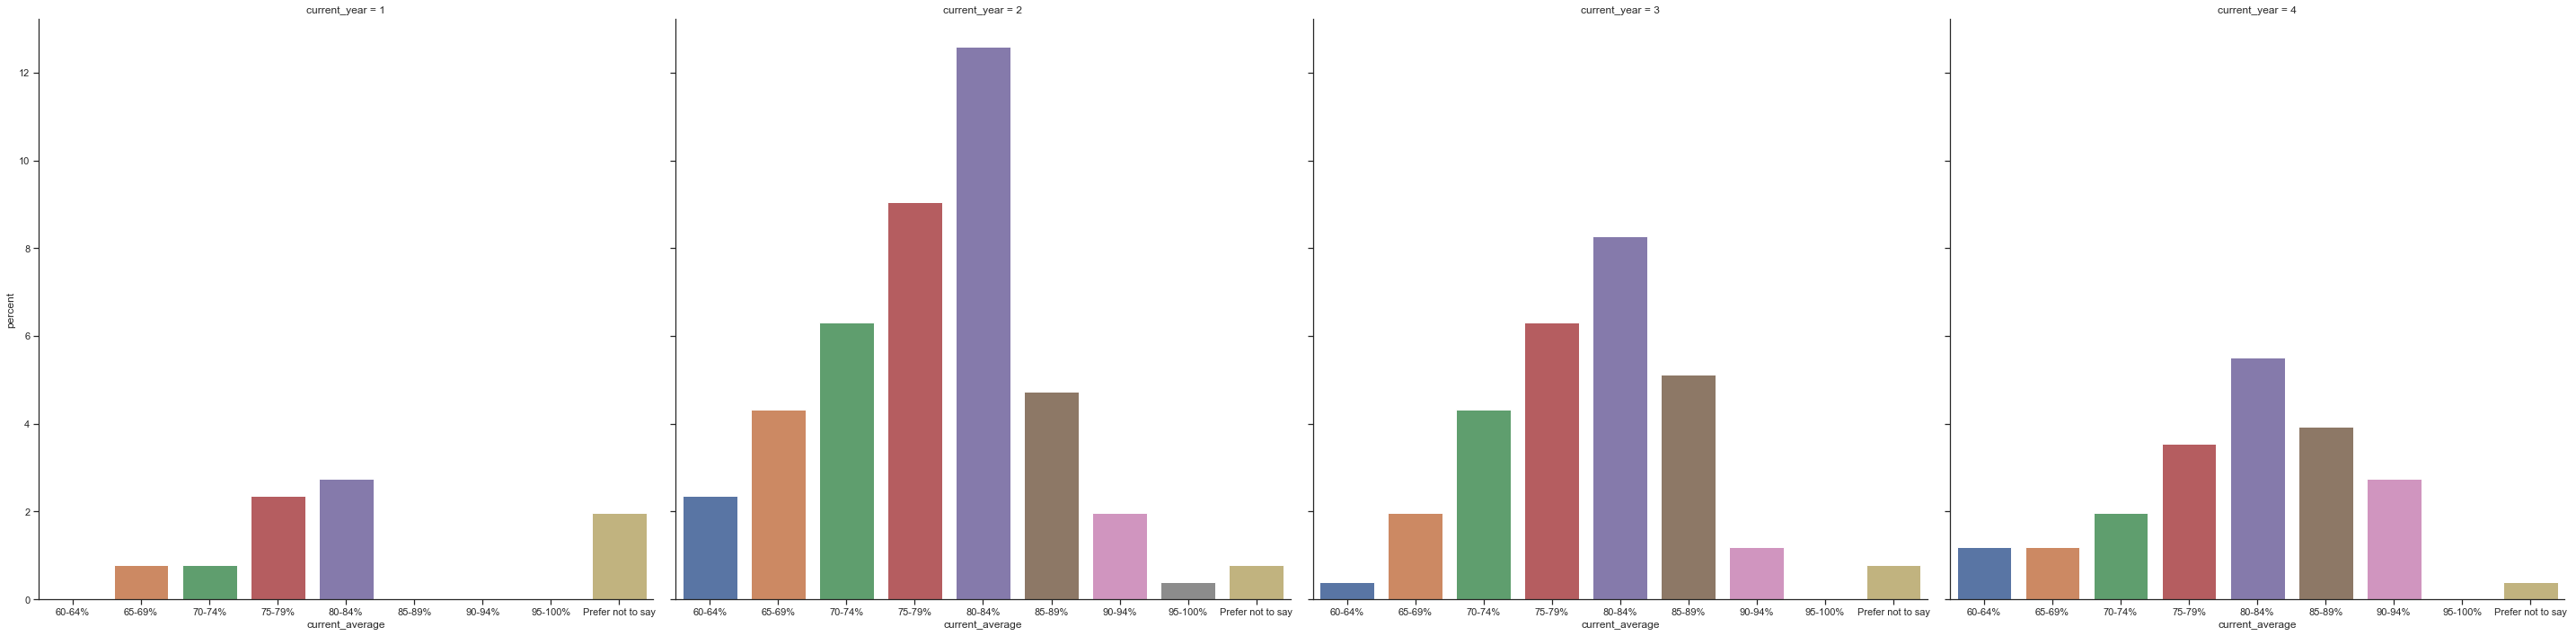

In [107]:

plot_data = normalize_1_variables(data,"current_average","current_year")
sns.catplot(y="percent",x="current_average",order=order,col="current_year",data=plot_data,kind='bar',height=10,aspect=1)
print("'Current Academic Year Vs. Current Cumulative Average'")


The visualization above attempts to see whether on the current year in which a student is in has an impact on their current average. There doesnt seem to be enough data on first year students in order to be able to make a valid claim, howeever, the data seems to skewed to the left, with a mean around the 75-79% range for both second and third year students. The data for fourth year students surprisingly seems to be skewed a little more to the right.

'High School Average Vs. Current Cumulative Average'


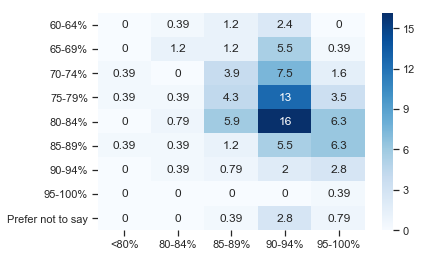

In [108]:

plot_data = normalize_1_variables(data,"current_average","hs_average")
plot_data = heatmapify(plot_data,"current_average",order,"hs_average",hs_order)
df = pd.DataFrame(plot_data, index=order, columns=hs_order)
sns.heatmap(df,annot=True,cmap="Blues")
print("'High School Average Vs. Current Cumulative Average'")

The heat map above shows the relationship between highschool average and current cumulative average. This does not appear to be the best predictor for current cumulative average. Majority of the students surveyed entered have entered with a 90-94% average. Given the narrow range of high school averages due to the high requirements for admission into engineering as a standalone factor, the high school average is not a significant enough predictor for the majority of students. The highest concentration for students seems to be that students who were admitted with a 90-94% average would have a current cumulative average of 80-84%. However inversely, for students on every cumulative average, it is most likely that they received a 90-94% average, with the sole exception of students who currently have a 95-100% average also has a similar highschool average.

'Nationality Status Vs. Current Cumulative Average'


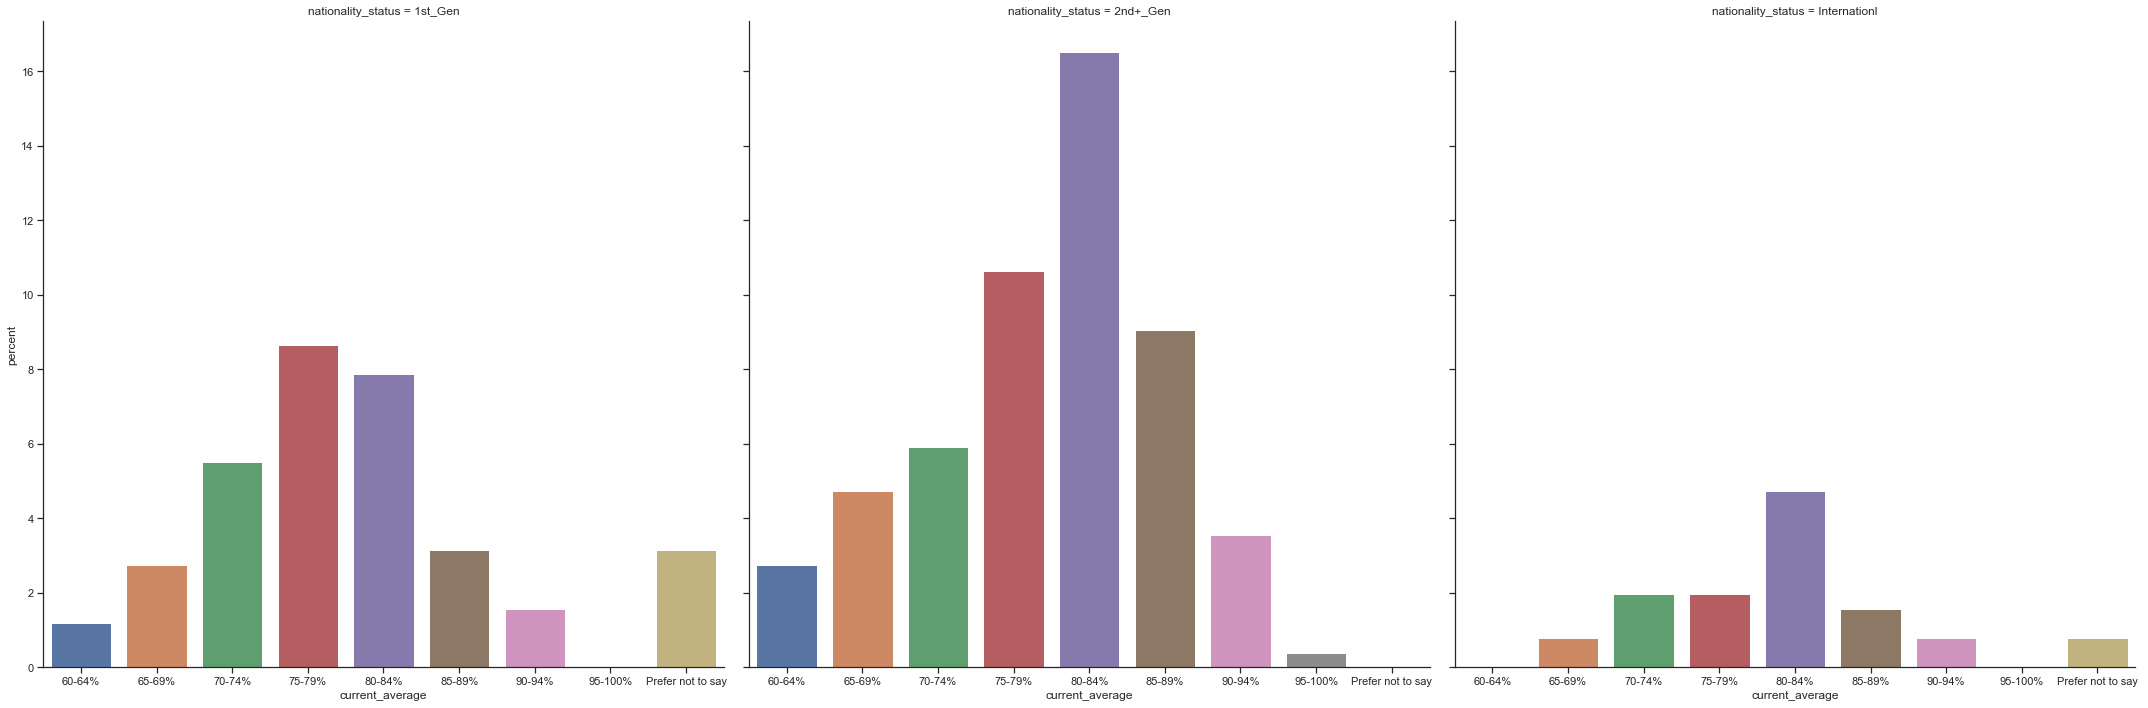

In [109]:

plot_data = normalize_1_variables(data,"current_average","nationality_status")
sns.catplot(y="percent",x="current_average",order=order,col="nationality_status",data=plot_data,kind='bar',height=10,aspect=1)
print("'Nationality Status Vs. Current Cumulative Average'")

The hypothesis behind the nationality status of students was that both first generation students and international would perform better than second generation students in terms of a cumulative average. However, it appears that first generation students have a lower performance rate (with a more of a left skew and mean of 75-79%) than that of second generation students (who both have a mean around 80-84% and are skewed more to the right than their first generation counterparts).

Text(0.5, 1.0, 'Nationality Status Vs. Current Cumulative Average')

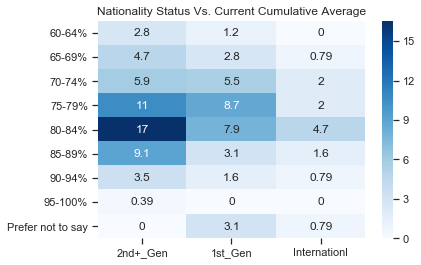

In [110]:
plot_data = normalize_1_variables(data,"current_average","nationality_status")
plot_data = heatmapify(plot_data,"current_average",order,"nationality_status",list(data["nationality_status"].unique()))
df = pd.DataFrame(plot_data, index=order, columns=list(data["nationality_status"].unique()))
sns.heatmap(df,annot=True,cmap="Blues").set_title('Nationality Status Vs. Current Cumulative Average')

Furthermore, as can be seen above, as a standalone explanatory variable, we can see that nationality status has a similar trait to highschool average where it does not act as a good singular predictor. However, it may be a good indicator when compounded and combined with other variables

Text(0.5, 1.0, 'Time Spent in Social Activities Vs. Current Cumulative Average')

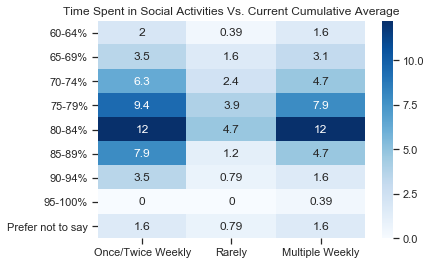

In [111]:
plot_data = normalize_1_variables(data,"current_average","social_time")
plot_data = heatmapify(plot_data,"current_average",order,"social_time",list(data["social_time"].unique()))
df = pd.DataFrame(plot_data, index=order, columns=list(data["social_time"].unique()))
sns.heatmap(df,annot=True,cmap="Blues").set_title('Time Spent in Social Activities Vs. Current Cumulative Average')

As can be seen above, most students participate in social activities at least once weekly. There is a wide variation on social activity as it relates to each class variable possibility. When compounded with other class variables, it offers to be a promising explanatory variable to act as a predictor.

Text(0.5, 1.0, 'Screen Time Vs. Current Cumulative Average')

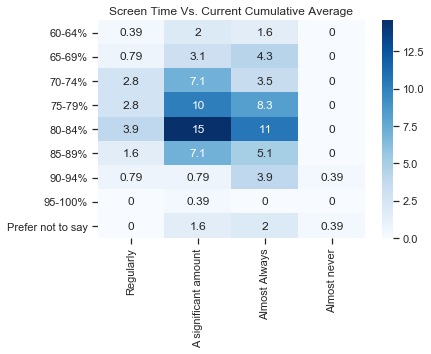

In [112]:
plot_data = normalize_1_variables(data,"current_average","screen_time")
plot_data = heatmapify(plot_data,"current_average",order,"screen_time",list(data["screen_time"].unique()))
df = pd.DataFrame(plot_data, index=order, columns=list(data["screen_time"].unique()))
sns.heatmap(df,annot=True,cmap="Blues").set_title('Screen Time Vs. Current Cumulative Average')

'Screen Time Vs. Current Cumulative Average'


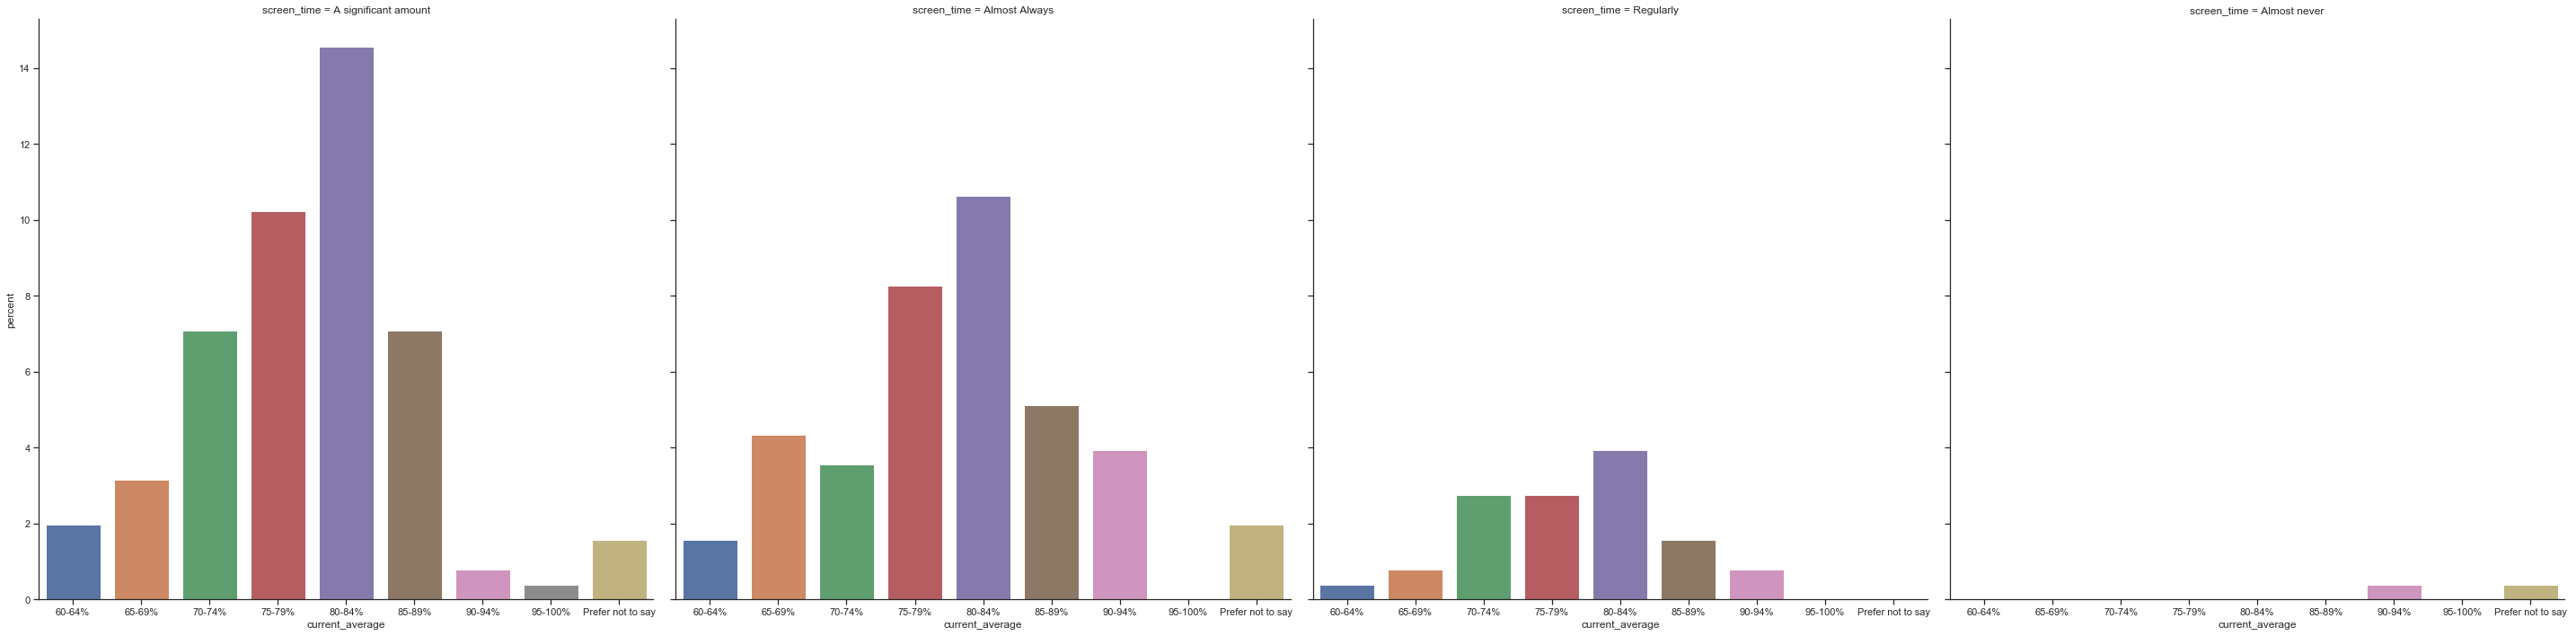

In [113]:
plot_data = normalize_1_variables(data,"current_average","screen_time")
sns.catplot(y="percent",x="current_average",order=order,col="screen_time",data=plot_data,kind='bar',height=10,aspect=1)
print("'Screen Time Vs. Current Cumulative Average'")

The heat map and collection of bar charts above show the effect of non-academic screen time on one's cumulative average. Majority of students reported that they either spend a siginificant amount of time or are almost always on their devices. The proportion of students in the categories of "Regularly" and "Almost Never" are too small to make any significant claims or observations, however, it can be noted that surprisingly, students who spend almost all their time on their screens tend to perform marginally better

Text(0.5, 1.0, 'Excercise Time Vs. Current Cumulative Average')

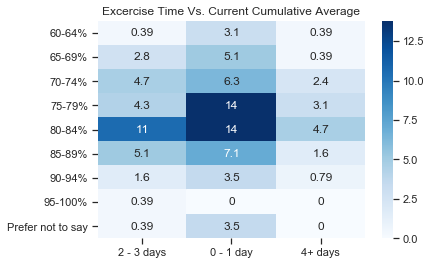

In [114]:
plot_data = normalize_1_variables(data,"current_average","excercise_time")
plot_data = heatmapify(plot_data,"current_average",order,"excercise_time",list(data["excercise_time"].unique()))
df = pd.DataFrame(plot_data, index=order, columns=list(data["excercise_time"].unique()))
sns.heatmap(df,annot=True,cmap="Blues").set_title('Excercise Time Vs. Current Cumulative Average')

''Excercise Time Vs. Current Cumulative Average'


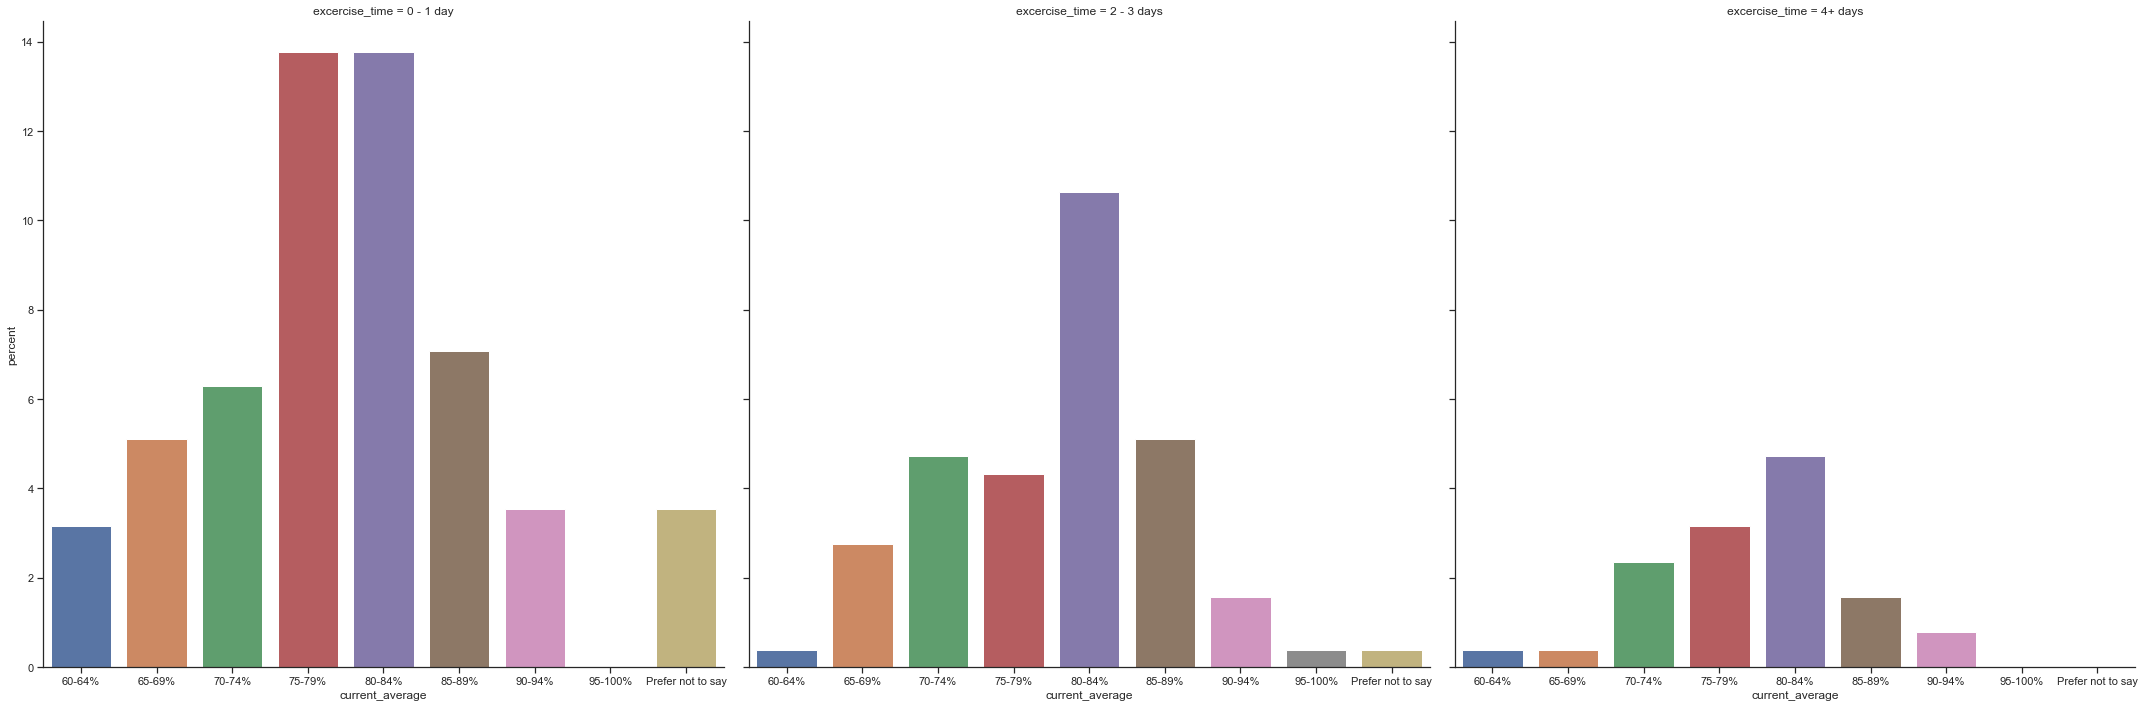

In [115]:
plot_data = normalize_1_variables(data,"current_average","excercise_time")
sns.catplot(y="percent",x="current_average",order=order,col="excercise_time",data=plot_data,kind='bar',height=10,aspect=1)
print("''Excercise Time Vs. Current Cumulative Average'")

The two charts above show no real difference between the categories of excercising 0-1 times weekly and 2-3+ times weekly. Surprisingly, the amount of time spent excercising does not appear to have any visible impact on one's cumulative average

Text(0.5, 1.0, 'School Work Time Vs. Current Cumulative Average')

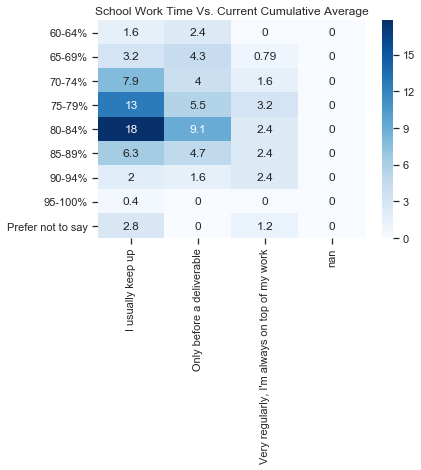

In [116]:
plot_data = normalize_1_variables(data,"current_average","school_work_time")
plot_data = heatmapify(plot_data,"current_average",order,"school_work_time",list(data["school_work_time"].unique()))
df = pd.DataFrame(plot_data, index=order, columns=list(data["school_work_time"].unique()))
sns.heatmap(df,annot=True,cmap="Blues").set_title('School Work Time Vs. Current Cumulative Average')

''School Work  Time Vs. Current Cumulative Average'


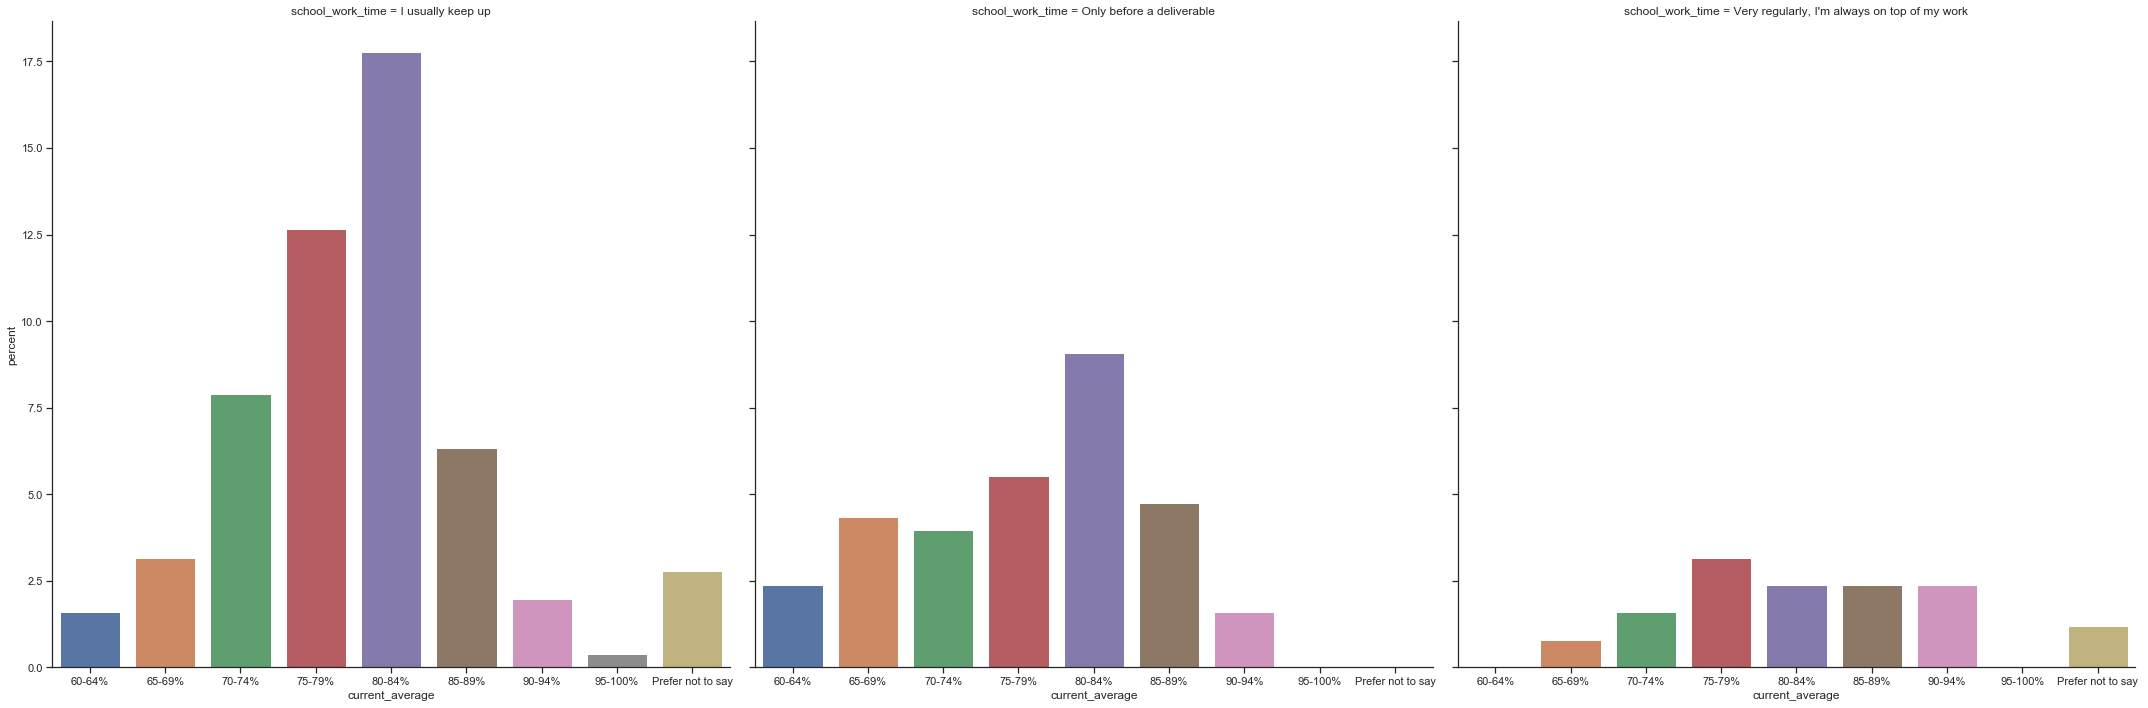

In [117]:
plot_data = normalize_1_variables(data,"current_average","school_work_time")
sns.catplot(y="percent",x="current_average",order=order,col="school_work_time",data=plot_data,kind='bar',height=10,aspect=1)
print("''School Work  Time Vs. Current Cumulative Average'")

There doesn't seem to be enough data collected yet to derive any significant corelation of cumulative averages to how rigiourously students approach their work and their cumulative averages. Majority of students selected the "I usually keep up" option. More data needs to be collected in order to gauge any significant impact of rigour in approach of school work on cumulative average.

''Academic Priority  Time Vs. Current Cumulative Average'


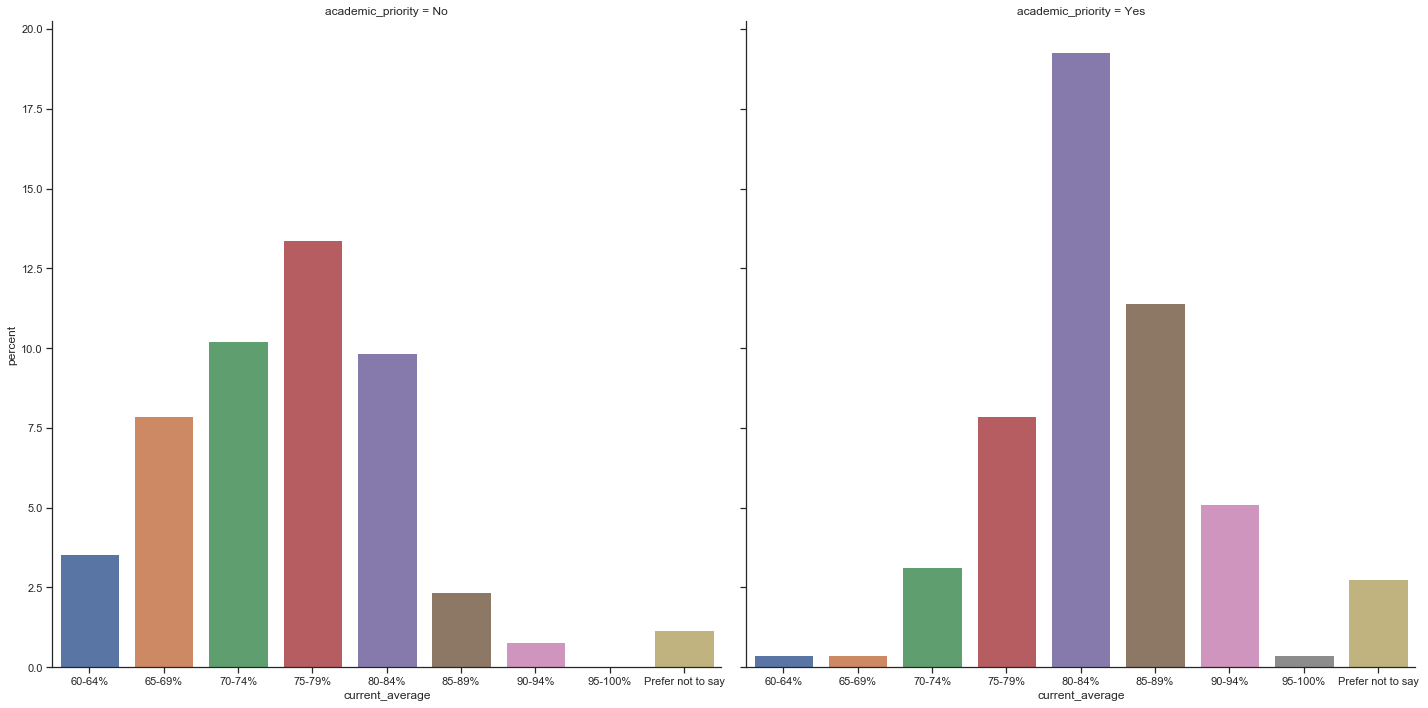

In [118]:
plot_data = normalize_1_variables(data,"current_average","academic_priority")
sns.catplot(y="percent",x="current_average",order=order,col="academic_priority",data=plot_data,kind='bar',height=10,aspect=1)
print("''Academic Priority  Time Vs. Current Cumulative Average'")

The most significant indicator so far for whether or not a student performs well academically or what cateogory of class variable the student will fall into is whether or not it is a priority for the student to attain a grade above an 80%+.

# VICTORIA

In [125]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')